<a href="https://colab.research.google.com/github/Sandipan234/Stock_predictor/blob/main/LSTM_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [4]:
#seting up training inputs

input_train=pd.read_csv('https://raw.githubusercontent.com/Sandipan234/Stock_predictor/104c3327a9e2a99c7ea4036a5ac85e57cacf06e5/HDFCBANK_TRAIN2.csv')
train_set=input_train.iloc[:,4:5].values

In [5]:
#Scaling the training Data

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
train_set_scaled=scale.fit_transform(train_set)

In [6]:
#Creating the data structure 
x_train=[]#stores the input for training
y_train=[]#stores the output to be checked for training
for i in range(30,740):
    x_train.append(train_set_scaled[i-30:i,0])
    y_train.append(train_set_scaled[i-1,0])#i instead of i+1 since last index is exclusive

In [7]:
#ensuring the shape of array
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#this resphapeing is done just to ensure that the data is in correct set
# print (x_train)

In [8]:
# !pip install tensorflow
# !pip install keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [9]:
model=keras.Sequential()

In [10]:
#Creating the Neural Network Structure

#adding 1st layer
model.add(LSTM(units=30,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#adding 2nd layer
model.add(LSTM(units=30,return_sequences=True))
model.add(Dropout(0.2))

#adding 3rd layer
model.add(LSTM(units=30,return_sequences=True))
model.add(Dropout(0.2))

#adding 4th layer
model.add(LSTM(units=30))
model.add(Dropout(0.2))



In [11]:
#adding the output layer
model.add(Dense(units=1))

In [12]:
#training the neural network
model.compile(optimizer ='adam',loss='mean_squared_error')

In [13]:
#Fitting the training data to the Neural Network
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
23/23 [==============================] - 9s 54ms/step - loss: 0.0797
Epoch 2/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0217
Epoch 3/100
23/23 [==============================] - 1s 54ms/step - loss: 0.0162
Epoch 4/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0128
Epoch 5/100
23/23 [==============================] - 1s 55ms/step - loss: 0.0119
Epoch 6/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0116
Epoch 7/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0120
Epoch 8/100
23/23 [==============================] - 1s 51ms/step - loss: 0.0105
Epoch 9/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0096
Epoch 10/100
23/23 [==============================] - 1s 52ms/step - loss: 0.0085
Epoch 11/100
23/23 [==============================] - 1s 52ms/step - loss: 0.0081
Epoch 12/100
23/23 [==============================] - 1s 58ms/step - loss: 0.0088
Epoch 13/100
23/23 [=====

In [14]:
#Seting up the test data
input_test=pd.read_csv('https://raw.githubusercontent.com/Sandipan234/Stock_predictor/104c3327a9e2a99c7ea4036a5ac85e57cacf06e5/HDFCBANK_TEST2.csv')
test_set=input_test.iloc[:,4:5].values

In [15]:
test_input=test_set.reshape(246,1)
test_inputs=scale.fit_transform(test_input)
x_test=[]
for i in range(30,246):
  x_test.append(test_inputs[i-30:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



In [16]:
predicted_price=model.predict(x_test)
predicted_price=scale.inverse_transform(predicted_price)

7/7 [==============================] - 2s 15ms/step


<function matplotlib.pyplot.show(*args, **kw)>

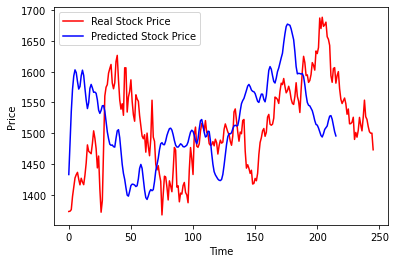

In [17]:
#ploting the result
plt.plot(test_set,color='red',label='Real Stock Price')
plt.plot(predicted_price,color='blue',label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show